In [1]:
%matplotlib inline

In [2]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

In [4]:
# Pull in census data file
census_data_path = "../Census_Data.csv"

census_data = pd.read_csv(census_data_path)


In [5]:
#pull out home value value variables
census_data_homes = census_data[['Total Population', 'Same house 1 year ago',
       'Geographical Mobility in past year','Median Yr Housing Blt', 'Median Yr HH moved into HH',
       'Median Gross Rent ($)', 'Median Value ($)', 'year', 'tract']]
census_data_homes.head()

percent_same_house = (census_data_homes['Same house 1 year ago'] / 
                      census_data_homes['Total Population'])*100
census_data_homes['% in same house 1 year ago'] = percent_same_house

census_data_homes

C:\Users\katie\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,Total Population,Same house 1 year ago,Geographical Mobility in past year,Median Yr Housing Blt,Median Yr HH moved into HH,Median Gross Rent ($),Median Value ($),year,tract,% in same house 1 year ago
0,4299.0,4062.0,4271.0,1941.0,1993,818.0,353700.0,2010,11100,94.487090
1,4655.0,4400.0,4643.0,1943.0,1996.0,811.0,355100.0,2011,11100,94.522019
2,4811.0,4508.0,4801.0,1943.0,1999.0,821.0,343700.0,2012,11100,93.701933
3,4702.0,4327.0,4702.0,1943.0,1999.0,873.0,336400.0,2013,11100,92.024670
4,5083.0,4538.0,5052.0,1944.0,2001.0,887.0,341700.0,2014,11100,89.277985
...,...,...,...,...,...,...,...,...,...,...
76,2182.0,2023.0,2182.0,1953.0,2002.0,547.0,271800.0,2014,9601,92.713107
77,2211.0,2073.0,2202.0,1952.0,2003.0,676.0,300500.0,2015,9601,93.758480
78,2383.0,2261.0,2373.0,1953.0,2004.0,622.0,312900.0,2016,9601,94.880403
79,2567.0,2394.0,2550.0,1953.0,2005.0,698.0,313600.0,2017,9601,93.260616


In [6]:
#need to take out tract 7301 (median value shows -6666666 for every year)

census_data_clean = census_data_homes.loc[census_data['tract'] != 7301, :]


#break out by tracts that stayed food deserts and those that did not
census_data_740_7603 = census_data_clean.loc[(census_data_clean['tract'] == 7401) |  (census_data_clean['tract'] == 7603), :]
census_data_not_740_7601 = census_data_clean.loc[(census_data_clean['tract'] != 7401) & (census_data_clean['tract'] != 7603),:]


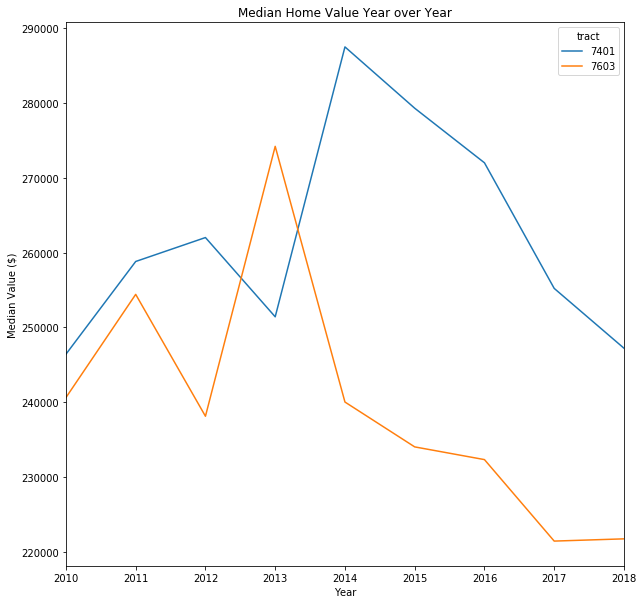

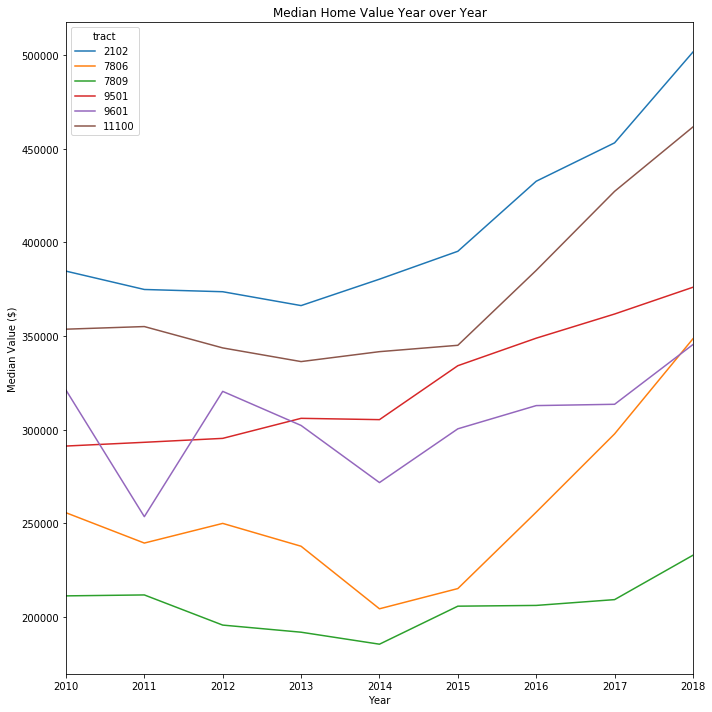

In [7]:
#plot Median Home Value
fig, ax = plt.subplots(figsize=(10,10))
census_data_740_7603.groupby(['year','tract']).mean()['Median Value ($)'].unstack().plot(ax=ax)
plt.title("Median Home Value Year over Year")
plt.xlabel("Year")
plt.ylabel("Median Value ($)")

fig.savefig('Median_House_Value1.jpg')

fig, ax = plt.subplots(figsize=(10,10))
census_data_not_740_7601.groupby(['year','tract']).mean()['Median Value ($)'].unstack().plot(ax=ax)
plt.title("Median Home Value Year over Year")
plt.xlabel("Year")
plt.ylabel("Median Value ($)")


plt.tight_layout()
plt.show()
fig.savefig('Median_House_Value2.jpg')

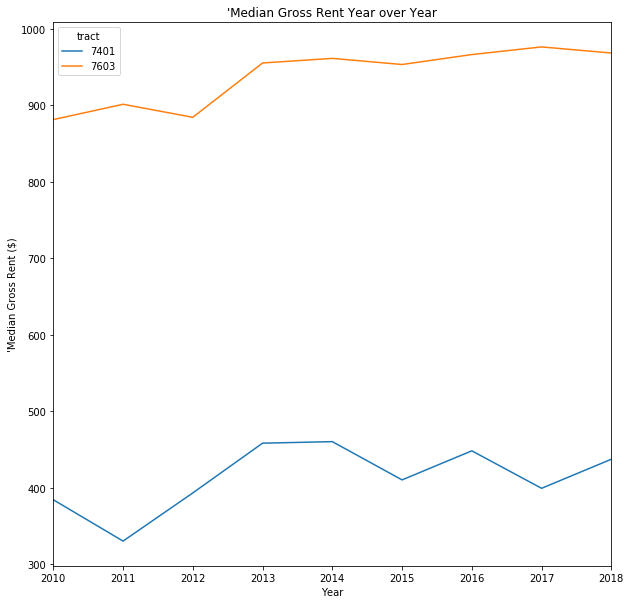

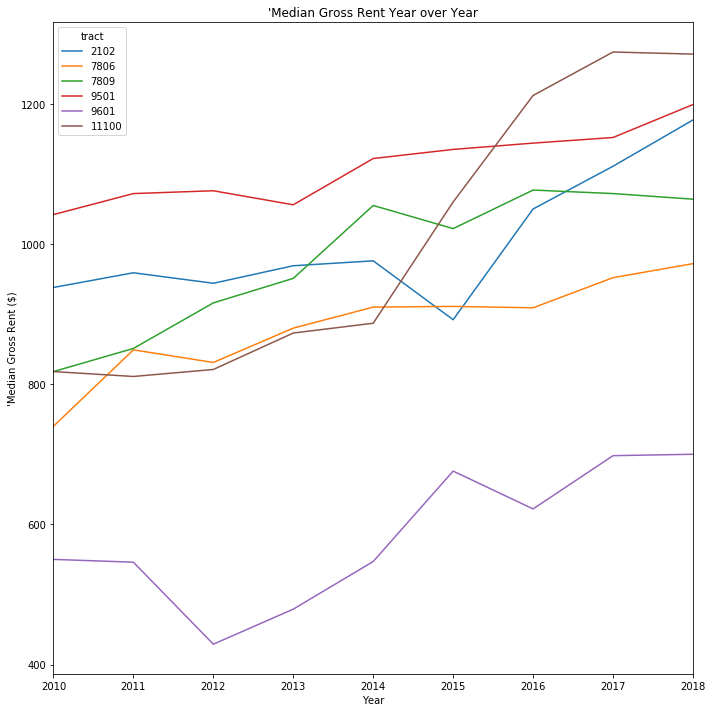

In [8]:
#plot Median Gross Rent
fig, ax = plt.subplots(figsize=(10,10))
census_data_740_7603.groupby(['year','tract']).mean()['Median Gross Rent ($)'].unstack().plot(ax=ax)
plt.title("'Median Gross Rent Year over Year")
plt.xlabel("Year")
plt.ylabel("'Median Gross Rent ($)")

fig.savefig('Median_Rent1.jpg')


fig, ax = plt.subplots(figsize=(10,10))
census_data_not_740_7601.groupby(['year','tract']).mean()['Median Gross Rent ($)'].unstack().plot(ax=ax)
plt.title("'Median Gross Rent Year over Year")
plt.xlabel("Year")
plt.ylabel("'Median Gross Rent ($)")

plt.tight_layout()
plt.show()
fig.savefig('Median_Rent2.jpg')

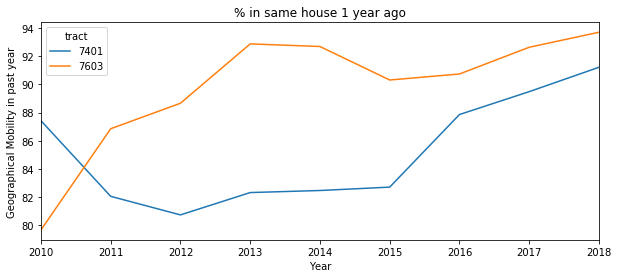

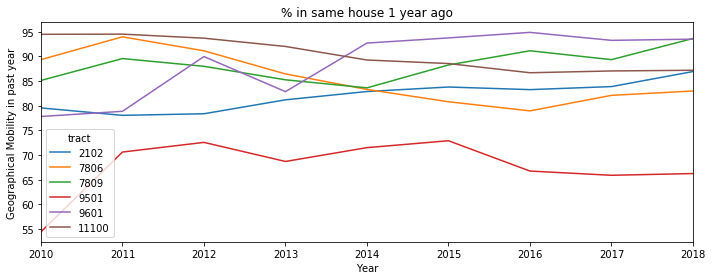

In [9]:
# plot mobility
fig, ax = plt.subplots(figsize=(10,4))
census_data_740_7603.groupby(['year','tract']).mean()['% in same house 1 year ago'].unstack().plot(ax=ax)
plt.title("% in same house 1 year ago")
plt.xlabel("Year")
plt.ylabel("Geographical Mobility in past year")


fig, ax = plt.subplots(figsize=(10,4))
census_data_not_740_7601.groupby(['year','tract']).mean()['% in same house 1 year ago'].unstack().plot(ax=ax)
plt.title("% in same house 1 year ago")
plt.xlabel("Year")
plt.ylabel("Geographical Mobility in past year")

plt.tight_layout()
plt.show()

In [10]:
#pull out income variables
census_data_income = census_data[['Total!!With income!!$1 to $9,999 or loss',
       'Total!!With income!!$10,000 to $14,999',
       'Total!!With income!!$15,000 to $24,999',
       'Total!!With income!!$25,000 to $34,999',
       'Total!!With income!!$35,000 to $49,999',
       'Total!!With income!!$50,000 to $64,999',
       'Total!!With income!!$65,000 to $74,999',
       'Total!!With income!!$75,000 or more', 'year', 'tract']]

# and aggregate 
census_data_income['Income under $35K'] = census_data_income['Total!!With income!!$1 to $9,999 or loss']
+ census_data_income['Total!!With income!!$10,000 to $14,999'] 
+ census_data_income['Total!!With income!!$15,000 to $24,999']
+ census_data_income['Total!!With income!!$25,000 to $34,999']

census_data_income['Income under $35K-49K'] = census_data_income['Total!!With income!!$35,000 to $49,999']

census_data_income['Income under $50K-74K'] = census_data_income['Total!!With income!!$50,000 to $64,999']
+ census_data_income['Total!!With income!!$65,000 to $74,999']

census_data_income['Income under $75K+'] =  census_data_income['Total!!With income!!$75,000 or more']    


census_data_income_clean = census_data_income[[ 'year', 'tract','Income under $35K', 'Income under $35K-49K', 'Income under $50K-74K', 'Income under $75K+']]
census_data_income_clean.head()

C:\Users\katie\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\katie\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\katie\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://p

,year,tract,Income under $35K,Income under $35K-49K,Income under $50K-74K,Income under $75K+
0,2010,11100,736.0,485.0,356.0,466.0
1,2011,11100,771.0,537.0,347.0,585.0
2,2012,11100,889.0,450.0,351.0,627.0
3,2013,11100,911.0,368.0,332.0,578.0
4,2014,11100,944.0,339.0,284.0,763.0


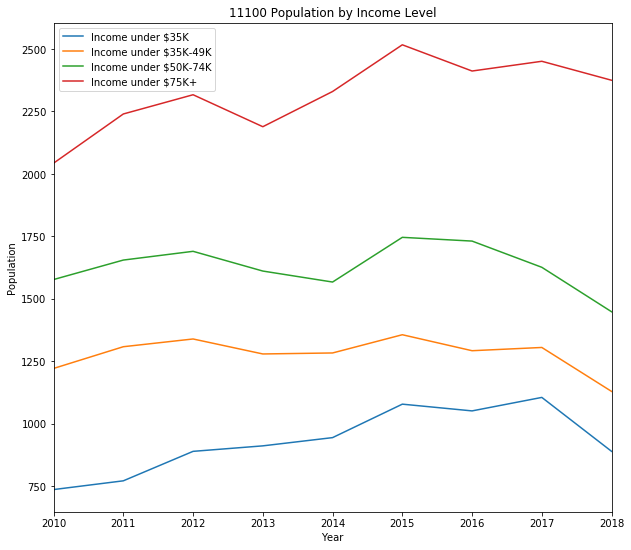

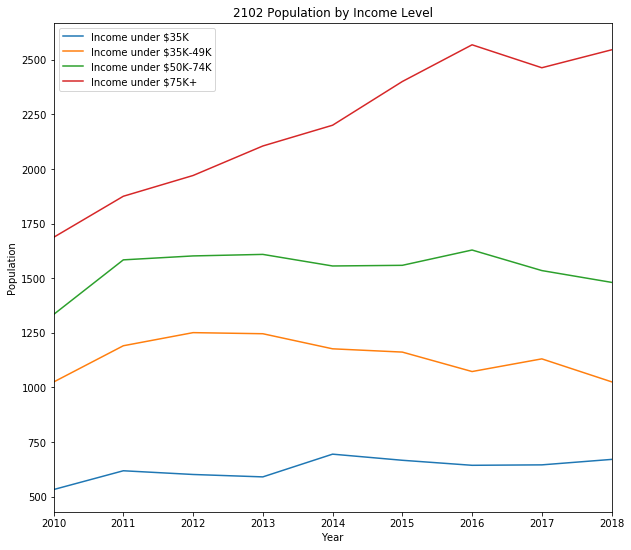

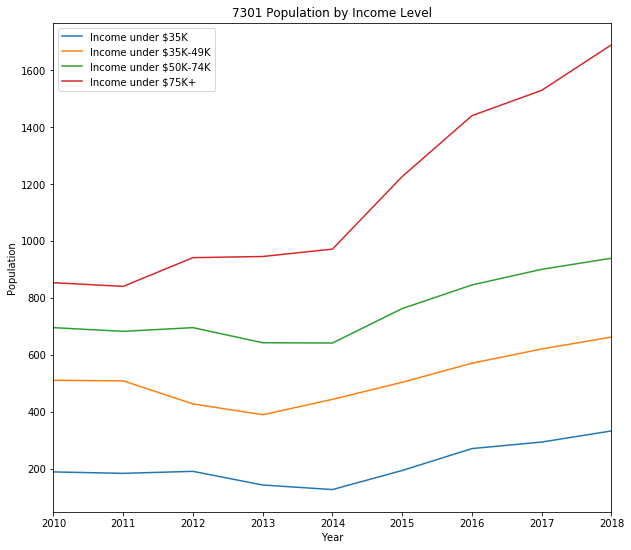

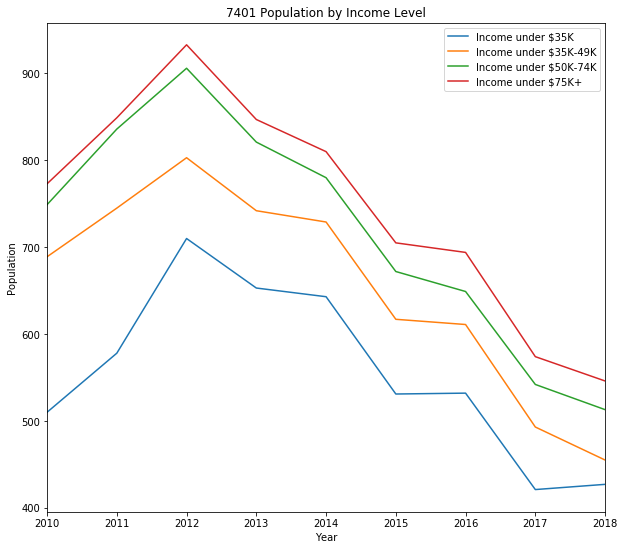

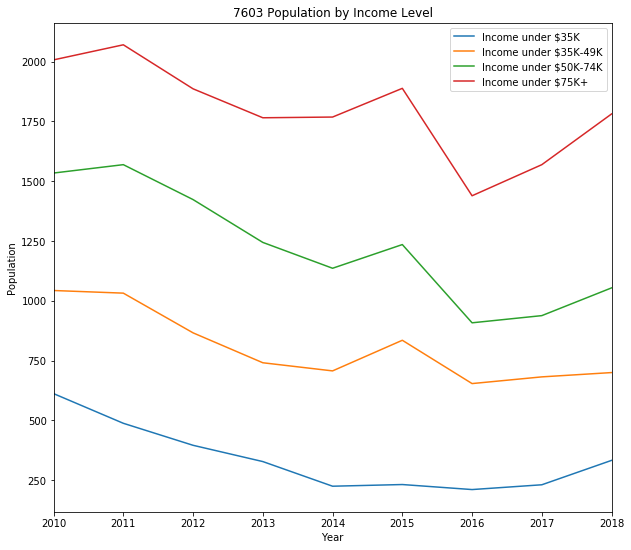

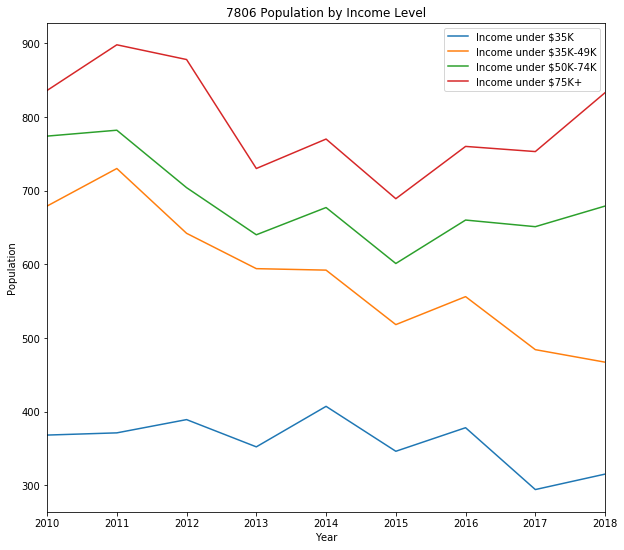

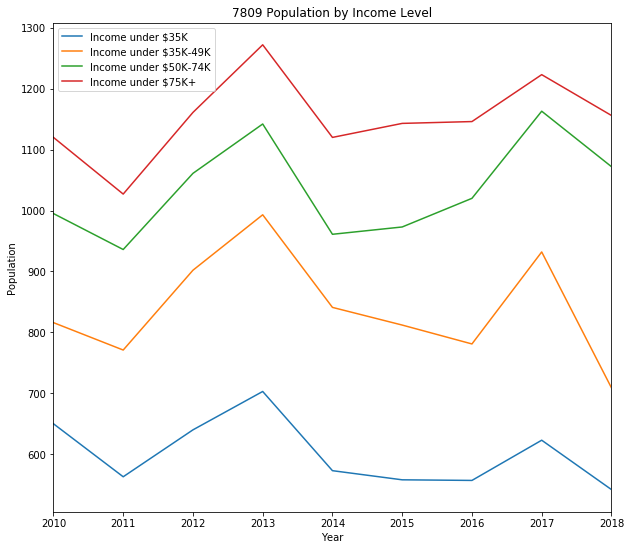

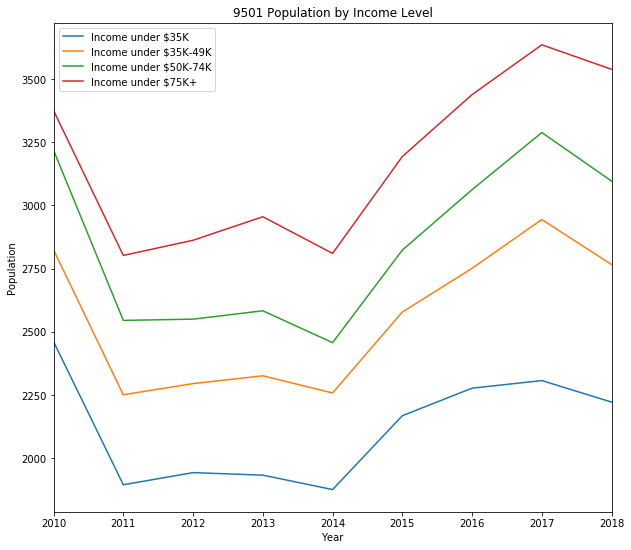

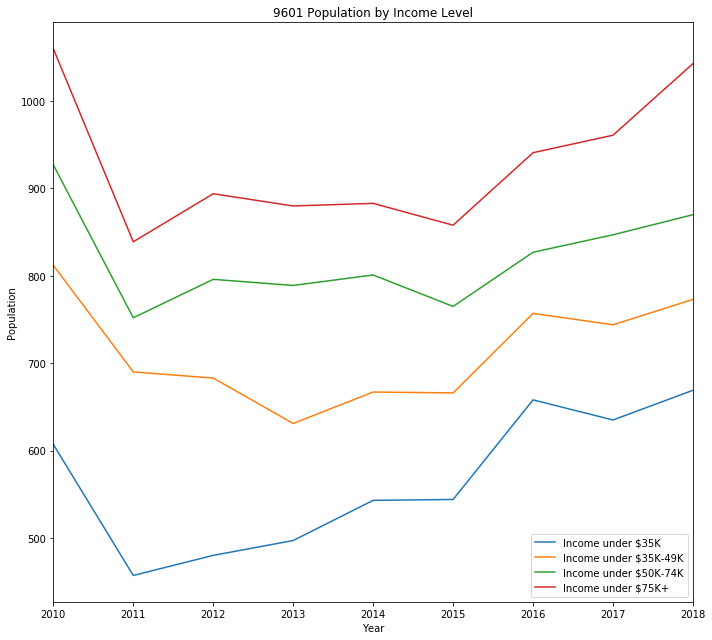

In [11]:
#create list of tracts
tract_list = census_data_income_clean['tract'].unique().tolist()

#loop through tract and graph income level year to year
for tract in tract_list:
    census_data_income_by_tract = census_data_income_clean.loc[census_data_income_clean['tract'] == tract, :]
    census_data_income_by_tract = census_data_income_by_tract.set_index('year')
    census_data_income_by_tract.loc[:,['Income under $35K','Income under $35K-49K','Income under $50K-74K','Income under $75K+']].plot.line(stacked=True, figsize=(10,9))
    plt.title(f"{tract} Population by Income Level")
    plt.xlabel("Year")
    plt.ylabel("Population")
    plt.savefig(f'Income{tract}.jpg')

plt.tight_layout()
plt.show()
fig.savefig('Population_by_Income.jpg')

In [12]:
census_data_age = census_data[["Total!!1 to 4 years", "Total!!5 to 17 years", "Total!!18 and 19 years",
                               "Total!!20 to 24 years", "Total!!25 to 29 years", "Total!!30 to 34 years", 
                               "Total!!35 to 39 years", "Total!!40 to 44 years", "Total!!45 to 49 years",
                               "Total!!50 to 54 years", "Total!!55 to 59 years", "Total!!60 to 64 years",
                               "Total!!65 to 69 years", "Total!!70 to 74 years", "Total!!75 years and over"
                               , 'year', 'tract']]

census_data_age['Age Under 18'] = census_data_age["Total!!1 to 4 years"] + census_data_age["Total!!5 to 17 years"] 
census_data_age['Age 18-29'] = census_data_age["Total!!18 and 19 years"] + census_data_age["Total!!20 to 24 years"] + census_data_age["Total!!25 to 29 years"]    
census_data_age['Age 30-39'] = census_data_age["Total!!30 to 34 years"] + census_data_age["Total!!35 to 39 years"] 
census_data_age['Age 40-49'] = census_data_age["Total!!40 to 44 years"] + census_data_age["Total!!45 to 49 years"] 
census_data_age['Age 50-59'] = census_data_age["Total!!50 to 54 years"] + census_data_age["Total!!55 to 59 years"] 
census_data_age['Age 60+'] = census_data_age["Total!!60 to 64 years"] + census_data_age["Total!!65 to 69 years"] + census_data_age["Total!!70 to 74 years"] + census_data_age["Total!!75 years and over"]

census_data_age_clean = census_data_age[['Age Under 18', 'Age 18-29', 'Age 30-39', 
                                         'Age 40-49', 'Age 50-59','Age 60+', 'year', 'tract']]
census_data_age_clean.head()

C:\Users\katie\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\katie\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\katie\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

,Age Under 18,Age 18-29,Age 30-39,Age 40-49,Age 50-59,Age 60+,year,tract
0,663.0,483.0,574.0,564.0,776.0,1211.0,2010,11100
1,874.0,487.0,651.0,585.0,860.0,1186.0,2011,11100
2,940.0,564.0,729.0,456.0,930.0,1182.0,2012,11100
3,825.0,621.0,653.0,423.0,959.0,1221.0,2013,11100
4,940.0,688.0,765.0,503.0,901.0,1255.0,2014,11100


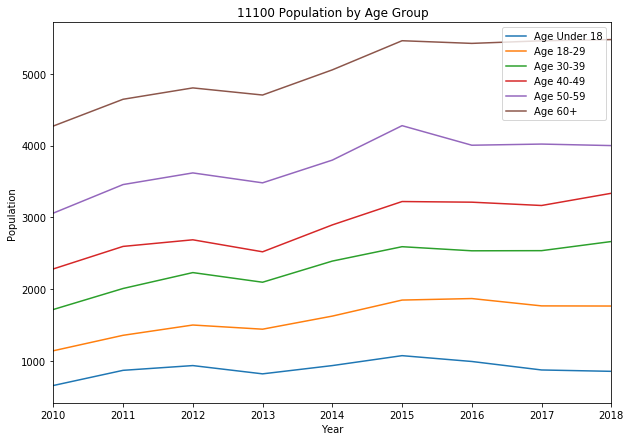

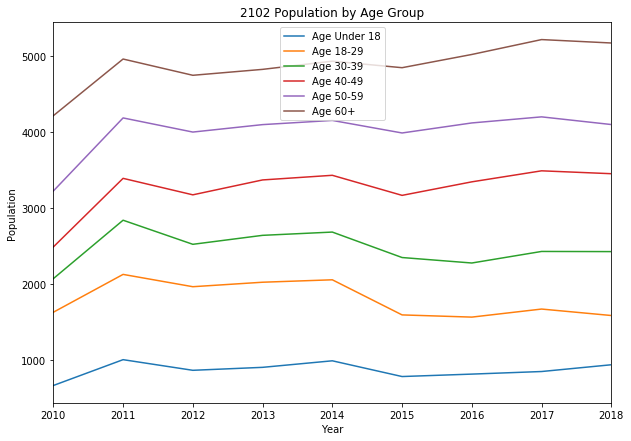

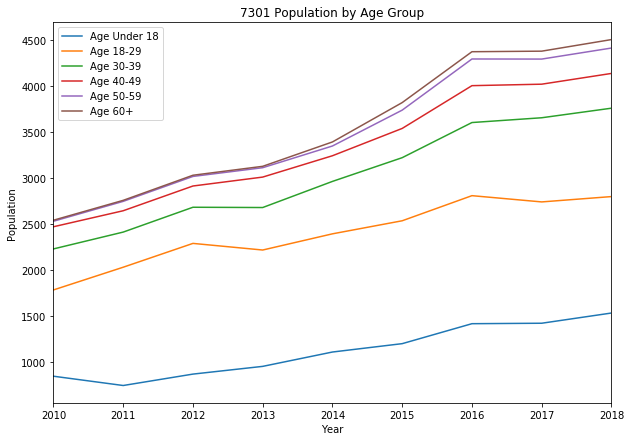

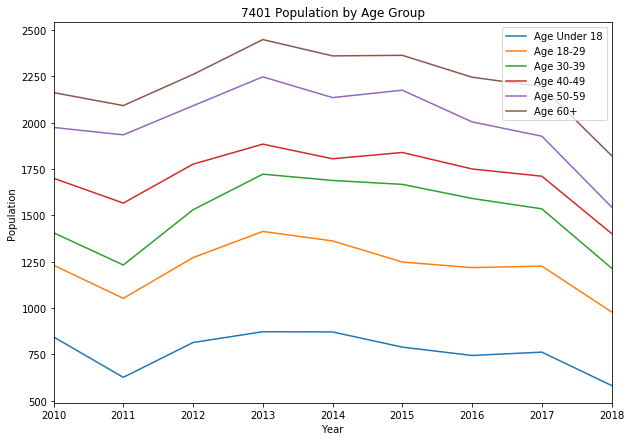

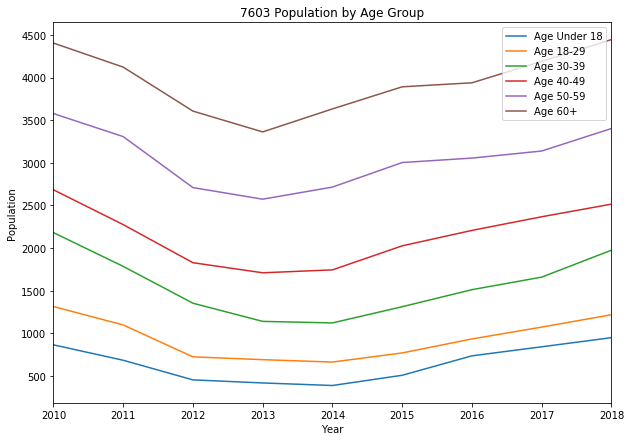

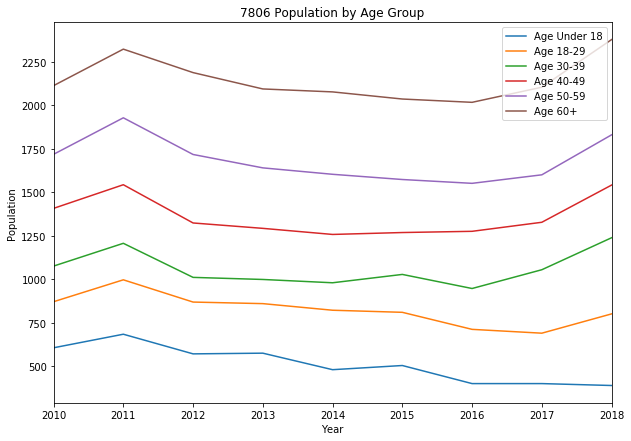

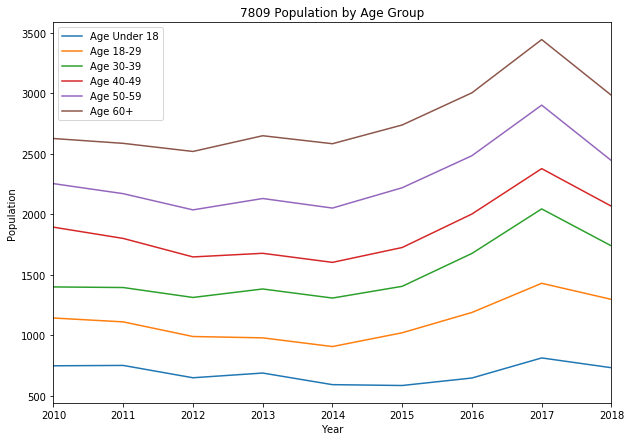

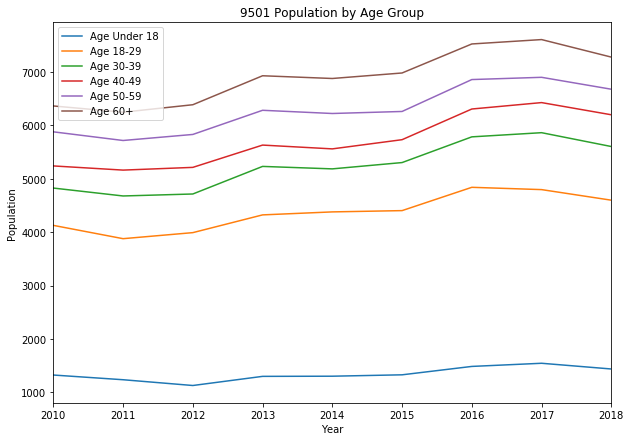

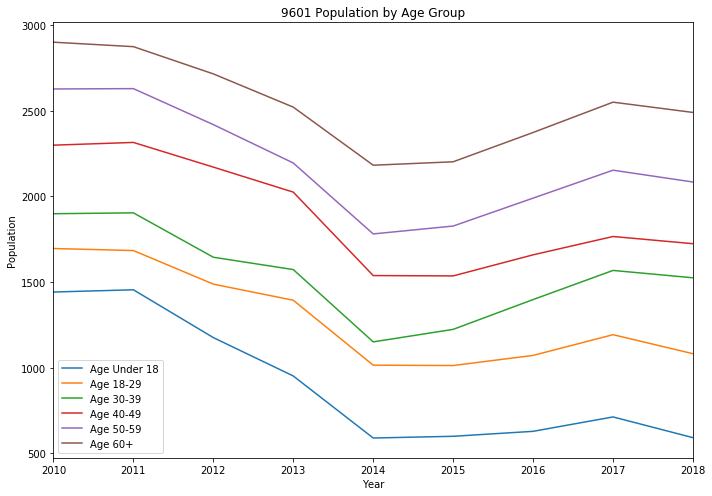

In [13]:
tract_list = census_data_age_clean['tract'].unique().tolist()

#loop through tract and graph age group year to year
for tract in tract_list:
    census_data_age_by_tract = census_data_age_clean.loc[census_data_age_clean['tract'] == tract, :]
    census_data_age_by_tract = census_data_age_by_tract.set_index('year')
    census_data_age_by_tract.loc[:,['Age Under 18', 'Age 18-29', 'Age 30-39', 'Age 40-49', 'Age 50-59','Age 60+']].plot.line(stacked=True, figsize=(10,7))
    plt.title(f"{tract} Population by Age Group")
    plt.xlabel("Year")
    plt.ylabel("Population")
    plt.savefig(f'Age{tract}.jpg')
    
plt.tight_layout()
plt.show()
fig.savefig('Population_by_Age.jpg')     

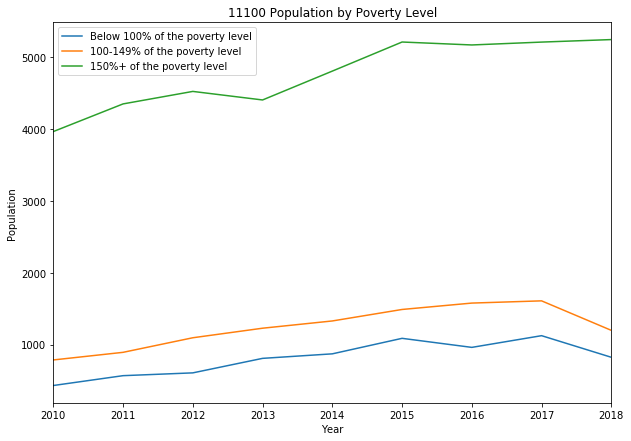

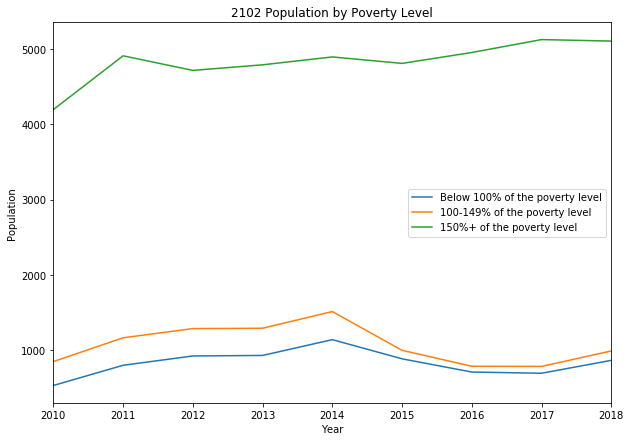

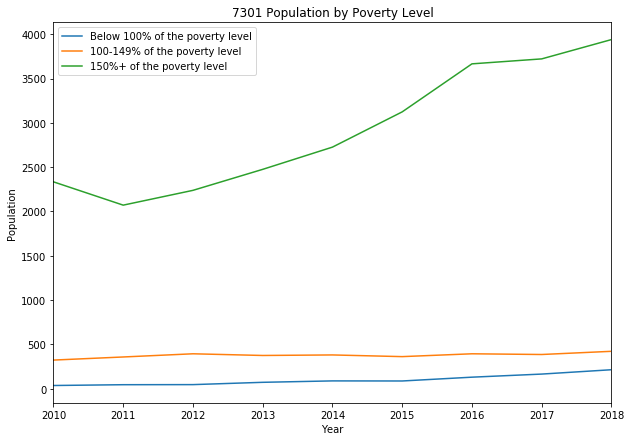

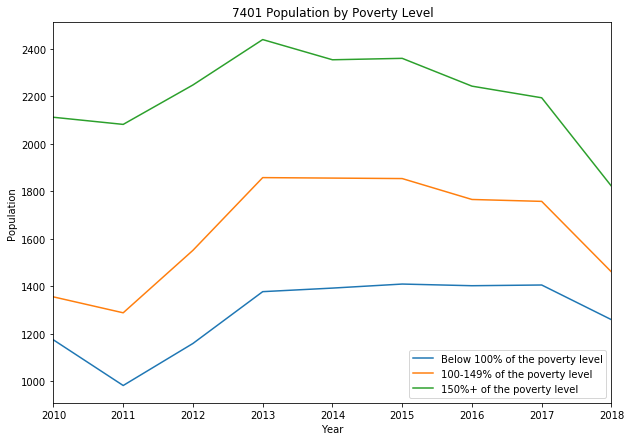

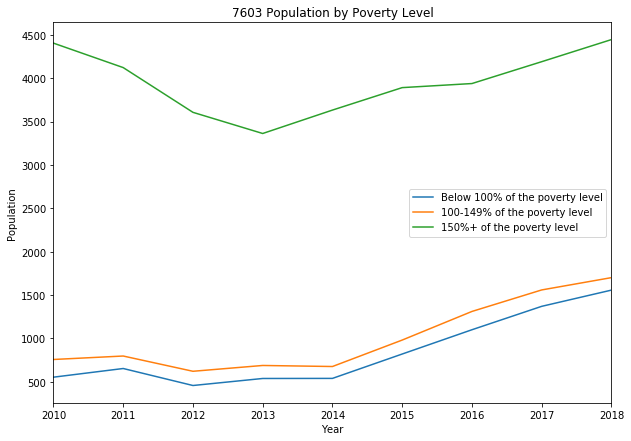

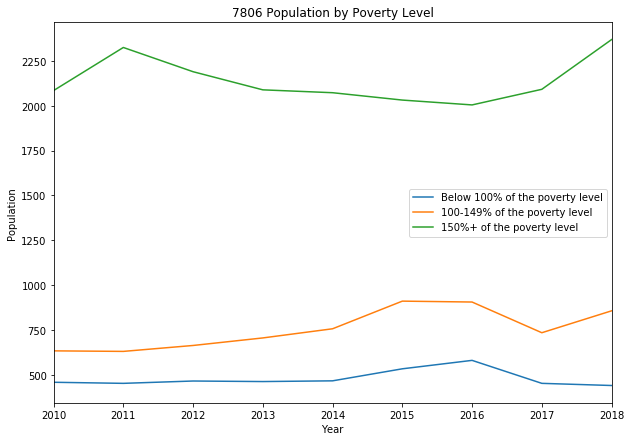

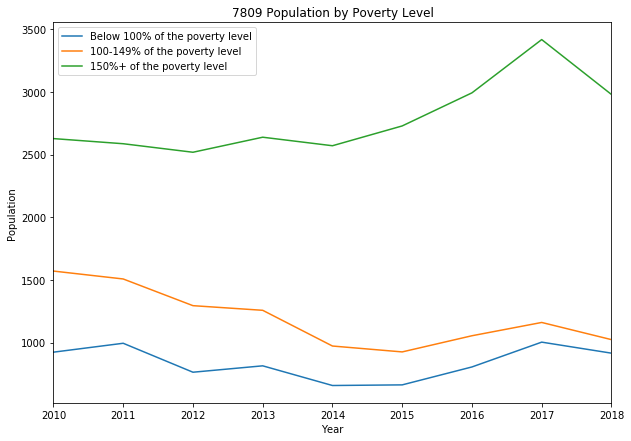

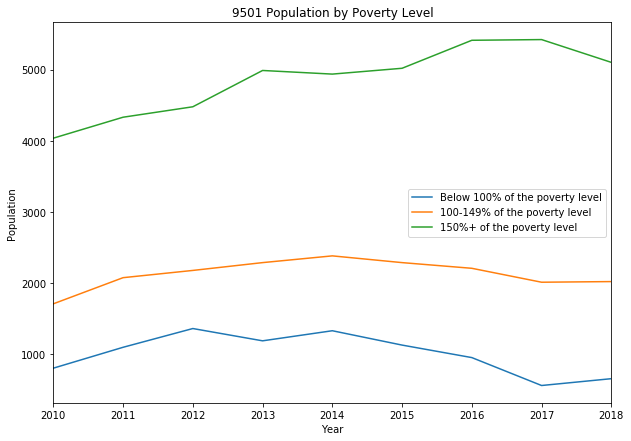

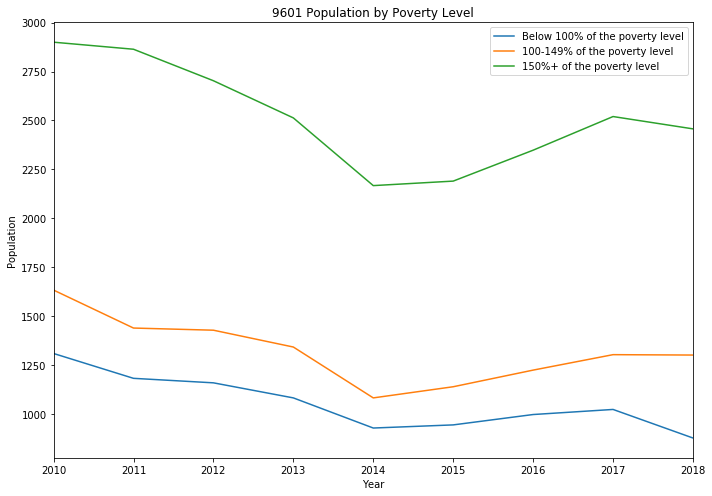

In [14]:
#pull out poverty level variables and clean up key labels 
census_data_poverty_level = census_data[['Total!!Below 100 percent of the poverty level',
    'Total!!100 to 149 percent of the poverty level', 'Total!!At or above 150 percent of the poverty level', 'year', 'tract']]

census_data_poverty_level = census_data_poverty_level.rename(columns={'Total!!Below 100 percent of the poverty level':'Below 100% of the poverty level',
    'Total!!100 to 149 percent of the poverty level':'100-149% of the poverty level',
    'Total!!At or above 150 percent of the poverty level':'150%+ of the poverty level'})

#loop through tract and graph poverty level year to year
for tract in tract_list:
    census_data_poverty_level_by_tract = census_data_poverty_level.loc[census_data_age_clean['tract'] == tract, :]
    census_data_poverty_level_by_tract = census_data_poverty_level_by_tract.set_index('year')
    census_data_poverty_level_by_tract.loc[:,['Below 100% of the poverty level', '100-149% of the poverty level', '150%+ of the poverty level']].plot.line(stacked=True, figsize=(10,7))
    plt.title(f"{tract} Population by Poverty Level")
    plt.xlabel("Year")
    plt.ylabel("Population")
    plt.savefig(f'Poverty Level{tract}.jpg')

plt.tight_layout()
plt.show()
fig.savefig('Poverty_Level.jpg') 


